# Clase 6 - Ejercicio 1: Logistic Regression - Human Activity Recognition

Se reutilizan los resultados obtenidos con PCA (práctica clase 2) para el dataset de Human Activity Recognition e intentar clasificar correctamente las muestras que denotan movimiento de las que no empleando las librerías de Sklearn. Para más información sobre los datos, consultar la fuente [original](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). 

## Librerías

In [13]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score

from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'


RANDOM_STATE = 17

In [14]:
import warnings
warnings.filterwarnings("ignore")


## Carga y propiedades del dataset

https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

In [15]:
PATH_DATASET = "data/UCI HAR Dataset/train"

In [16]:
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)

### Estructura del dataset

In [17]:
print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))

Estructura features del dataset: (7352, 561)
Estructura de las etiquetas: (7352,)


In [18]:
# Exploramos un poco las features
df = pd.DataFrame(data=X_train)
df.describe()

0            1            2            3            4    \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.274488    -0.017695    -0.109141    -0.605438    -0.510938   
std       0.070261     0.040811     0.056635     0.448734     0.502645   
min      -1.000000    -1.000000    -1.000000    -1.000000    -0.999873   
25%       0.262975    -0.024863    -0.120993    -0.992754    -0.978129   
50%       0.277193    -0.017219    -0.108676    -0.946196    -0.851897   
75%       0.288461    -0.010783    -0.097794    -0.242813    -0.034231   
max       1.000000     1.000000     1.000000     1.000000     0.916238   

               5            6            7            8            9    ...  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000  ...   
mean     -0.604754    -0.630512    -0.526907    -0.606150    -0.468604  ...   
std       0.418687     0.424073     0.485942     0.414122     0.544547  ...   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000  ...   
25%      -0.980233    -0.993591    -0.978162    -0.980251    -0.936219  ...   
50%      -0.859365    -0.950709    -0.857328    -0.857143    -0.881637  ...   
75%      -0.262415    -0.292680    -0.066701    -0.265671    -0.017129  ...   
max       1.000000     1.000000     0.967664     1.000000     1.000000  ...   

               551          552          553          554          555  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.125293    -0.307009    -0.625294     0.008684     0.002186   
std       0.250994     0.321011     0.307584     0.336787     0.448306   
min      -1.000000    -0.995357    -0.999765    -0.976580    -1.000000   
25%      -0.023692    -0.542602    -0.845573    -0.121527    -0.289549   
50%       0.134000    -0.343685    -0.711692     0.009509     0.008943   
75%       0.289096    -0.126979    -0.503878     0.150865     0.292861   
max       0.946700     0.989538     0.956845     1.000000     1.000000   

               556          557          558          559          560  
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000  
mean      0.008726    -0.005981    -0.489547     0.058593    -0.056515  
std       0.608303     0.477975     0.511807     0.297480     0.279122  
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000  
25%      -0.482273    -0.376341    -0.812065    -0.017885    -0.143414  
50%       0.008735    -0.000368    -0.709417     0.182071     0.003181  
75%       0.506187     0.359368    -0.509079     0.248353     0.107659  
max       0.998702     0.996078     1.000000     0.478157     1.000000  

[8 rows x 561 columns]

In [19]:
#Verificación de elementos nan
df.isna().sum().sum()

0

In [20]:
# Cantidad única de clases
clases = np.unique(y_train)
clases

array([1, 2, 3, 4, 5, 6])

In [21]:
n_clases = clases.size

In [22]:
n_clases

6

|     Label     |   Descripción  | 
| ------------- |:-------------: |
|       1       | Caminar        | 
|       2       | Subir escaleras|
|       3       | Bajar escaleras|
|       4       | Estar sentado  |
|       5       | Estar parado   |
|       6       | Recostarse     |

## PCA

In [23]:
# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

Se aplica PCA rescatanda feature que garanticen un 90% de la varianza

In [24]:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [25]:
# Cantidad de componentes necesarios
X_pca.shape[1]

63

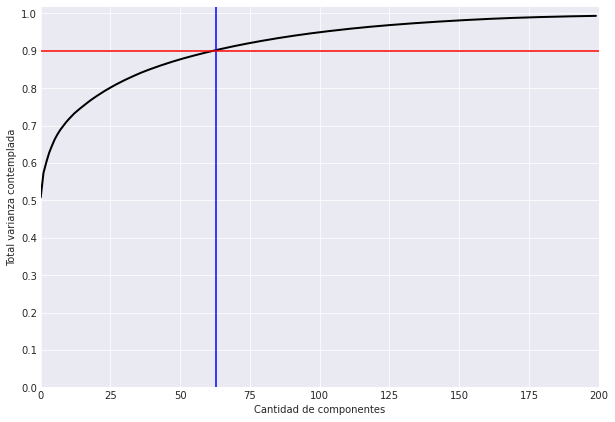

In [26]:
pca_2 = PCA(n_components=200, random_state=RANDOM_STATE).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.9, c='r')
plt.show();

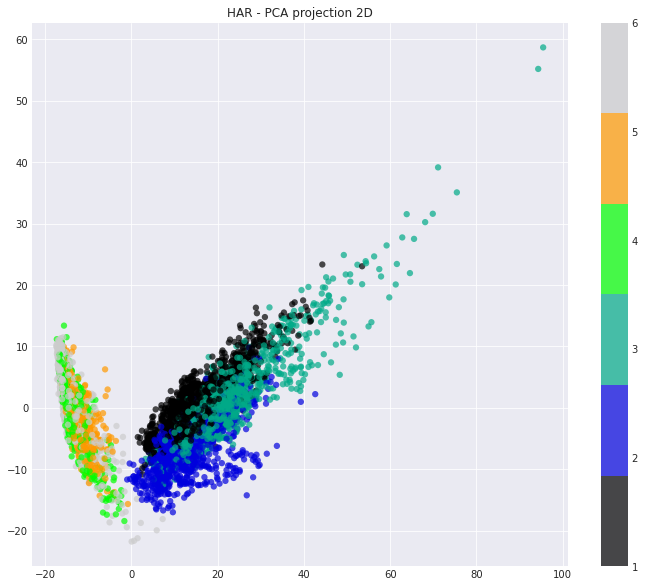

In [27]:
# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()

plt.title('HAR - PCA projection 2D');

### Clusterización

In [28]:
n_clases = 6
kmeans = KMeans(n_clusters=n_clases, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

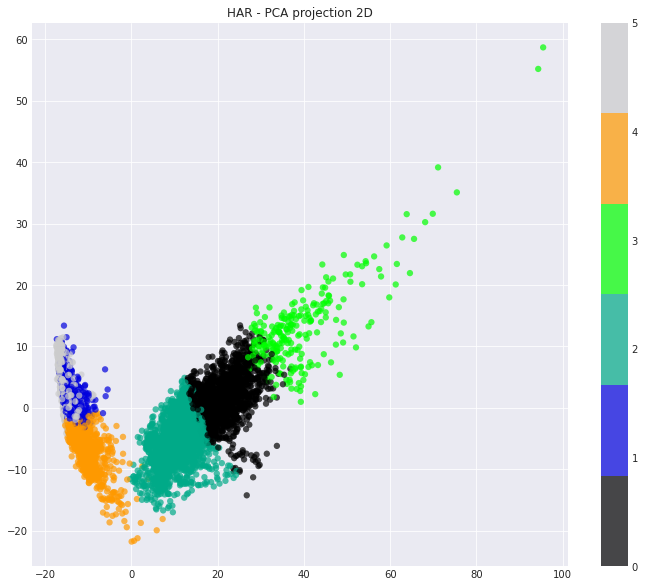

In [29]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

In [30]:
kmeans_move = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster_labels_mov = kmeans_move.labels_

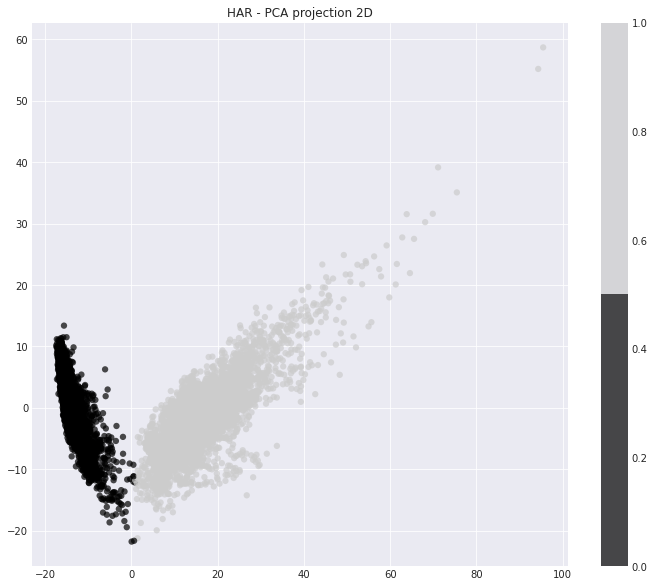

In [31]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

In [32]:
tab = pd.crosstab(y_train, cluster_labels, margins=True)
tab.index = ['Caminar', 'Subir escaleras', 'Bajar escaleras', 'Estar parado', 'Estar sentado', 'Recostarse', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(6)] + ['Todos']
tab

cluster 0  cluster 1  cluster 2  cluster 3  cluster 4  \
Caminar                512          0        646         68          0   
Subir escaleras        210          0        856          5          2   
Bajar escaleras        620          0        200        166          0   
Estar parado             0        884          1          0        315   
Estar sentado            0        999          0          0        375   
Recostarse               0         26          4          0        270   
Todos                 1342       1909       1707        239        962   

                 cluster 5  Todos  
Caminar                  0   1226  
Subir escaleras          0   1073  
Bajar escaleras          0    986  
Estar parado            86   1286  
Estar sentado            0   1374  
Recostarse            1107   1407  
Todos                 1193   7352

In [33]:
tab = pd.crosstab(y_train, cluster_labels_mov, margins=True)
tab.index = ['Caminar', 'Subir escaleras', 'Bajar escaleras', 'Estar parado', 'Estar sentado', 'Recostarse', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(2)] + ['Todos']
tab

cluster 0  cluster 1  Todos
Caminar                  0       1226   1226
Subir escaleras          8       1065   1073
Bajar escaleras          0        986    986
Estar parado          1285          1   1286
Estar sentado         1374          0   1374
Recostarse            1396         11   1407
Todos                 4063       3289   7352

---

## Clasificación

Se puede observar en el gráfico de los primeros dos componentes de PCA, y en los resultados de la clusterización por K-means con dos clusters, que potencialmente se podrían separar con los dos primeros componentes, los estados de movimiento respecto de los estados en reposo. 

In [34]:
y_train[:5]

array([5, 5, 5, 5, 5])

In [35]:
# Armamos máscaras para mapear las actividades a reposo (1) o movimiento (0)
# y = {1, 2, 3} => 0, y = {4, 5, 6} => 1 

act_mask = y_train <= 3
st_mask = y_train > 3

In [36]:
#Verificación de la máscara
st_mask[:5]

array([ True,  True,  True,  True,  True])

In [37]:
y_class_train = y_train.copy()

y_class_train[act_mask] = 0
y_class_train[st_mask] = 1

In [38]:
y_class_train[:5]

array([1, 1, 1, 1, 1])

In [39]:
y_class_train.shape

(7352,)

In [40]:
x_class_train = X_pca[:, :2]

In [41]:
x_class_train.shape

(7352, 2)

# Clasificación
Para efectuar la clasificación mediante sklearn, se especifican: 
- Tipo de algoritmo de optimización: se aplica "newton-cg" como método de minimización cuadrática.
- La opción multi_class='ovr' para que la función se aplique a un problema binario. 

In [61]:
#Creación del objeto de clasificación. 
classifier = LogisticRegression(multi_class='ovr',solver='newton-cg') 
classifier.fit(x_class_train, y_class_train)
pred_labels = classifier.predict(x_class_train)

In [59]:
x,y = np.meshgrid(np.arange(-20,100,0.1),np.arange(-30,60,0.1))

In [60]:
# Armar los vectores (x,y) para pasarle al modelo y que haga las predicciones

# flatten de cada uno de los vectores
xx, yy = x.flatten(), y.flatten()
# se le pone explícita la dimensión 1
xx, yy = xx.reshape((len(xx), 1)), yy.reshape((len(yy), 1))

# stack horizontal para que queden pares (x,y)
grid = np.hstack((xx,yy))

In [45]:
#(x,y)
grid 

array([[-20. , -30. ],
       [-19.9, -30. ],
       [-19.8, -30. ],
       ...,
       [ 99.7,  59.9],
       [ 99.8,  59.9],
       [ 99.9,  59.9]])

In [46]:
# predicciones sobre todo el grid
yhat = classifier.predict(grid)
# le 
zz = yhat.reshape(x.shape)

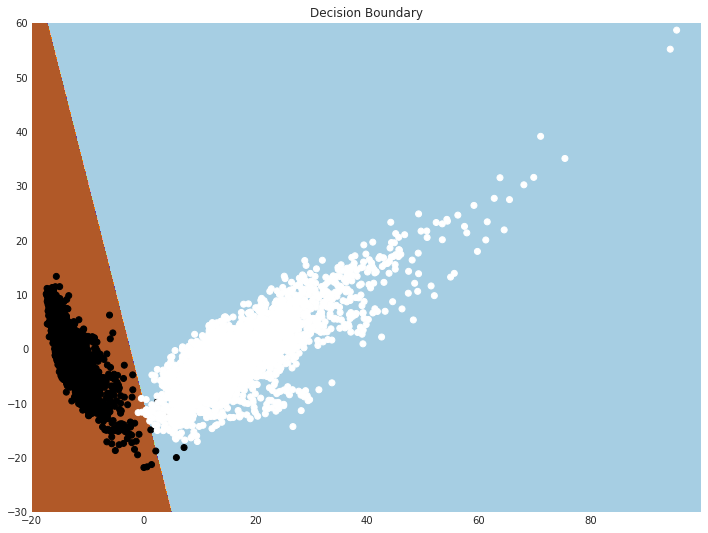

In [47]:
# Grafica los colores de fondo
plt.contourf(x, y, zz, cmap='Paired')

# Grafica los puntos de cada clase, les asigna color "c" en función del valor de y_class_train
plt.scatter(x_class_train[:, 0], x_class_train[:, 1], c=y_class_train[:])
# Valores en "y" de la frontera de decisión
# Plot de la frontera negra
#plt.plot(x_class_train[:, 0], y_vals, c="k")

# Metadata
plt.title('Decision Boundary')
plt.ylim((-30, 60))
plt.show()

### Predicciones sobre el Dataset de Test

In [48]:
# Cargamos el dataset de test

PATH_DATASET = "data/UCI HAR Dataset/test"

X_test = np.loadtxt(os.path.join(PATH_DATASET, "X_test.txt"))
y_test = np.loadtxt(os.path.join(PATH_DATASET, "y_test.txt")).astype(int)

In [49]:
X_test.shape

(2947, 561)

In [50]:
# Debemos aplicar las mismas transformaciones sobre el dataset de test que se
# realizaron al dataset de train

X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
x_class_test = X_test_pca[:, :2]

In [51]:
x_class_test.shape

(2947, 2)

In [52]:
# Armamos máscaras para mapear las actividades a reposo (1) o movimiento (0)
# y = {1, 2, 3} => 0, y = {4, 5, 6} => 1 

act_mask = y_test <= 3
st_mask = y_test > 3

In [53]:
y_class_test = y_test.copy()

y_class_test[act_mask] = 0
y_class_test[st_mask] = 1

In [54]:
y_class_test.shape

(2947,)

In [55]:
classifier_t = LogisticRegression(C=1e5, solver='newton-cg') # solver='Liblinear'
classifier_t.fit(x_class_test, y_class_test)
pred_labels_test = classifier.predict(x_class_test)
pred_labels_test.shape

(2947,)

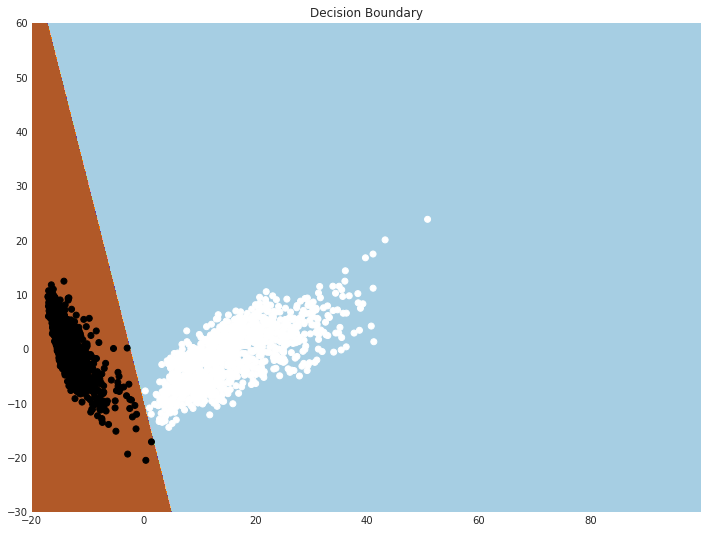

In [56]:
# Grafica los colores de fondo
plt.contourf(x, y, zz, cmap='Paired')

# Grafica los puntos de cada clase, les asigna color "c" en función del valor de y_class_train
plt.scatter(x_class_test[:, 0], x_class_test[:, 1], c=pred_labels_test)
# Plot de la frontera negra
#plt.plot(x_class_train[:, 0], y_vals, c="k")

# Metadata
plt.title('Decision Boundary')
plt.ylim((-30, 60))
plt.show()

### Calculamos las Métricas

In [57]:
accuracy = accuracy_score(y_class_test, pred_labels_test)
precision = precision_score(y_class_test, pred_labels_test)
recall = recall_score(y_class_test, pred_labels_test)
names = ['Accuracy', 'Precision', 'Recall']
results = [accuracy, precision, recall]

for i in range(len(names)):
    name = names[i]
    result = results[i]  
    print('{metric}: {value}'.format(metric=name, value=result))


Accuracy: 0.999660671869698
Precision: 1.0
Recall: 0.9993589743589744
